In [1]:
# PCA_multi_components
#
"""
Labels
Each training and test example is assigned to one of the following labels:
0 T-shirt/top  1 Trouse  2 Pullover  3 Dress   4 Coat
5 Sandal       6 Shirt   7 Sneaker   8 Bag     9 Ankle boot 

TL;DR
Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

"""
#
# loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# load dataset
#   Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

#   split data table into data Features (x) and class labels (y)
xdf_train = df_training.iloc[:, 1:]
ydf_train = df_training.iloc[:, :1]


#   Test data
#   split data table into data Features (x) and class labels (y)
df_test = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttest.csv')

#   split data table into data Features (x) and class labels (y)
xdf_test = df_test.iloc[:, 1:]
ydf_test = df_test.iloc[:, :1]

#   Convert to numpy array
x_train = xdf_train.as_matrix()
y_train = ydf_train.as_matrix()
x_test = xdf_test.as_matrix()
y_test = ydf_test.as_matrix()


In [3]:
# Reshape array
y2_train = np.ravel( y_train[ : , 0] ) 
y2_test = np.ravel( y_test[ : , 0] ) 

#
x_train.shape
y2_train.shape


(60000L,)

In [4]:
# plot sample of images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y2_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)


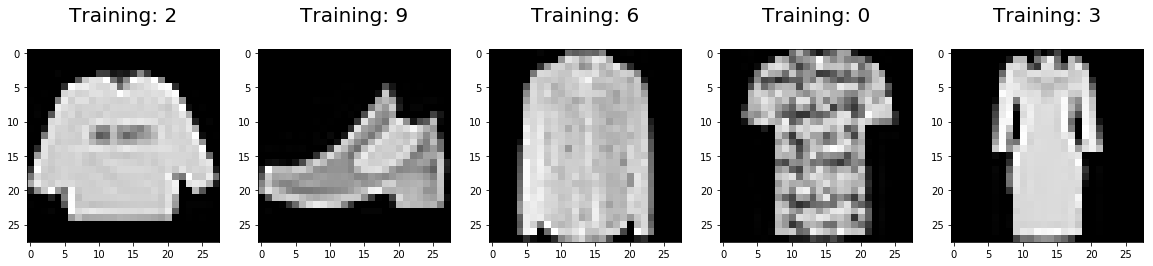

In [5]:
plt.show()


In [6]:
# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x_train)


C:\Users\rivas\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)


In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,784,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)


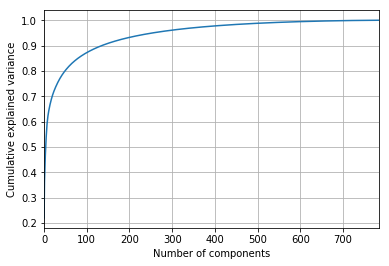

In [9]:
plt.show()


In [10]:
# Using 50 components
time_strt = datetime.now()
#
sklearn50_pca = PCA(n_components=50)
X_50 = sklearn50_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "50 components: running time", (time_fin - time_strt)


50 components: running time 0:00:11.064000


In [11]:
X_50.shape

(60000L, 50L)

In [12]:
# Using 100 components
time_strt = datetime.now()
#
sklearn100_pca = PCA(n_components=100)
X_100 = sklearn100_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "100 components: running time", (time_fin - time_strt)


100 components: running time 0:00:13.311000


In [13]:
X_100.shape


(60000L, 100L)

In [14]:
# Using 300 components
time_strt = datetime.now()
#
sklearn300_pca = PCA(n_components=300)
X_300 = sklearn300_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "300 components: running time", (time_fin - time_strt)


300 components: running time 0:00:34.525000


In [15]:
X_300.shape

(60000L, 300L)

In [16]:
# Using 600 components
time_strt = datetime.now()
#
sklearn600_pca = PCA(n_components=600)
X_600 = sklearn600_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "600 components: running time", (time_fin - time_strt)


600 components: running time 0:01:18.130000


In [17]:
X_600.shape


(60000L, 600L)

In [18]:
# PCA - Prepare Test data for Predictive models
#
X_std = StandardScaler().fit_transform(x_test)
pca = PCA().fit(X_std)


In [19]:
# Test data - Using 50 components
time_strt = datetime.now()
#
sklearn50_pca = PCA(n_components=50)
Xtest_50 = sklearn50_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "300 components for Test data: running time", (time_fin - time_strt)


300 components for Test data: running time 0:00:01.716000


In [20]:
Xtest_50.shape


(10000L, 50L)

In [21]:
# Test data - Using 600 components
time_strt = datetime.now()
#
sklearn600_pca = PCA(n_components=600)
Xtest_600 = sklearn600_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print "600 components for Test data: running time", (time_fin - time_strt)


600 components for Test data: running time 0:00:13.470000


In [22]:
Xtest_600.shape


(10000L, 600L)

In [23]:
# Will Run different Classifiers
# Logistic Regression after PCA
# 1 - Import the model
from sklearn.linear_model import LogisticRegression


# 2 - Make an instance of the Model
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [24]:
# 3 - Training the model on the data
#     fitting the model
time_strt = datetime.now()
logisticRegr.fit(X_50, y2_train)
time_fin = datetime.now()
print "Fitting Model - 50 Components: running time", (time_fin - time_strt)


Fitting Model - 50 Components: running time 0:00:21.751000


In [25]:
# 4 - Predict the response
time_strt = datetime.now()
logisticRegr_predict = logisticRegr.predict(Xtest_50)
time_fin = datetime.now()
print "Predict - 50 Components: running time", (time_fin - time_strt)


Predict - 50 Components: running time 0:00:00.019000


In [26]:
# 5 - Evaluate accuracy
#     loading libraries
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    

In [27]:
print 'Accuracy:', accuracy_score(y2_test, logisticRegr_predict)


Accuracy: 0.6137


In [28]:
print '\n clasification report:\n', classification_report(y2_test,logisticRegr_predict)



 clasification report:
             precision    recall  f1-score   support

          0       0.69      0.73      0.71      1000
          1       0.81      0.90      0.85      1000
          2       0.47      0.45      0.46      1000
          3       0.68      0.72      0.70      1000
          4       0.55      0.48      0.51      1000
          5       0.44      0.44      0.44      1000
          6       0.37      0.36      0.37      1000
          7       0.57      0.61      0.59      1000
          8       0.81      0.87      0.84      1000
          9       0.69      0.59      0.63      1000

avg / total       0.61      0.61      0.61     10000



In [29]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, logisticRegr_predict)



 confussion matrix:
[[730  32  24 121   4   2  57   3  25   2]
 [ 15 899  11  52   5   0   5   0   1  12]
 [ 13  63 445   5 276   3 166   4  21   4]
 [ 61  78   7 718   6   1 121   1   4   3]
 [ 19  12 178  32 477   0 228  10  39   5]
 [  7   3  29  14  10 440   7 301  45 144]
 [212   7 222  64  80   3 362   3  40   7]
 [  0   0   0   0   0 296   2 608  25  69]
 [  5  11  10  38   6   6  17  18 870  19]
 [  2   1  22   6   1 260   4 111   5 588]]


In [30]:
# 3 - Training the model with PCA - 600 components
#     fitting the model
time_strt = datetime.now()
logisticRegr.fit(X_600, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:02:08.915000


In [31]:
# 4 - Predict the response
time_strt = datetime.now()
logisticRegr_predict = logisticRegr.predict(Xtest_600)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:00:00.125000


In [32]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, logisticRegr_predict)


Accuracy: 0.6295


In [33]:
print '\n clasification report:\n', classification_report(y2_test,logisticRegr_predict)



 clasification report:
             precision    recall  f1-score   support

          0       0.69      0.71      0.70      1000
          1       0.88      0.91      0.89      1000
          2       0.48      0.51      0.49      1000
          3       0.63      0.76      0.69      1000
          4       0.53      0.44      0.48      1000
          5       0.51      0.48      0.49      1000
          6       0.31      0.29      0.30      1000
          7       0.69      0.61      0.65      1000
          8       0.76      0.85      0.80      1000
          9       0.77      0.74      0.75      1000

avg / total       0.62      0.63      0.63     10000



In [34]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, logisticRegr_predict)



 confussion matrix:
[[709  20  34 118   7   0  82   2  26   2]
 [  9 905  19  51   6   0   9   0   1   0]
 [ 23   4 508  11 239   1 175   4  35   0]
 [ 62  81  11 764  12   1  62   1   5   1]
 [ 22   6 177  94 442   4 182   0  73   0]
 [ 18   3  21  52   6 478  64 192  38 128]
 [174   9 269  95 107   5 290   2  46   3]
 [  0   0   0   1   0 261   2 608  40  88]
 [ 11   6  12  27  14  12  41  22 850   5]
 [  1   0  13   2   8 174  14  47   0 741]]


In [35]:
# DecisionTreeClassifier after PCA
# 1 - Import the model
from sklearn.tree import DecisionTreeClassifier

# 2 - Make an instance of the Model
dtr = DecisionTreeClassifier()


In [43]:
# 3 - Training the model with PCA - 50 components
#     fitting the model
time_strt = datetime.now()
dtr.fit(X_50, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:00:17.405000


In [44]:
# 4 - Predict the response
time_strt = datetime.now()
dtr_predict = dtr.predict(Xtest_50)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:00:00.016000


In [45]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, dtr_predict)


Accuracy: 0.5903


In [46]:
print '\n clasification report:\n', classification_report(y2_test,dtr_predict)



 clasification report:
             precision    recall  f1-score   support

          0       0.59      0.55      0.57      1000
          1       0.83      0.88      0.85      1000
          2       0.43      0.42      0.42      1000
          3       0.63      0.61      0.62      1000
          4       0.46      0.43      0.45      1000
          5       0.56      0.58      0.57      1000
          6       0.32      0.38      0.35      1000
          7       0.65      0.62      0.63      1000
          8       0.81      0.80      0.81      1000
          9       0.67      0.63      0.65      1000

avg / total       0.59      0.59      0.59     10000



In [47]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, dtr_predict)



 confussion matrix:
[[552  20  64  93  13   3 227   1  26   1]
 [ 13 875  14  66   4   1  25   0   2   0]
 [ 29   4 417  21 252  11 230   1  33   2]
 [ 99 120  38 608  47   5  66   0  12   5]
 [ 47   9 214  80 431  10 187   2  12   8]
 [ 11   1  15   9   5 585  32 208  22 112]
 [160  15 178  65 150   9 383   3  34   3]
 [  5   0   0   1   0 184   1 621  24 164]
 [ 22   4  30  23  25  19  49  10 803  15]
 [  1   0   2   1   3 220  11 113  21 628]]


In [48]:
# 3 - Training the model with PCA - 600 components
#     fitting the model
time_strt = datetime.now()
dtr.fit(X_600, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:04:29.797000


In [49]:
# 4 - Predict the response
time_strt = datetime.now()
dtr_predict = dtr.predict(Xtest_600)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:00:00.076000


In [50]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, dtr_predict)


Accuracy: 0.6071


In [51]:
print '\n clasification report:\n', classification_report(y2_test,dtr_predict)



 clasification report:
             precision    recall  f1-score   support

          0       0.59      0.59      0.59      1000
          1       0.90      0.90      0.90      1000
          2       0.41      0.42      0.42      1000
          3       0.62      0.63      0.62      1000
          4       0.41      0.40      0.41      1000
          5       0.61      0.61      0.61      1000
          6       0.31      0.32      0.31      1000
          7       0.68      0.68      0.68      1000
          8       0.81      0.81      0.81      1000
          9       0.76      0.70      0.73      1000

avg / total       0.61      0.61      0.61     10000



In [52]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, dtr_predict)



 confussion matrix:
[[593  10  54 106  16   6 197   0  18   0]
 [ 14 900  13  52   5   0  15   0   1   0]
 [ 45  11 425  23 272  11 183   2  27   1]
 [108  61  33 626  76   1  77   0  16   2]
 [ 39   4 262  92 399   3 170   1  27   3]
 [  6   0  12  10  12 614  26 193  32  95]
 [168  13 202  89 161  11 321   3  30   2]
 [  2   0   0   1   0 199   1 684  11 102]
 [ 25   1  34  12  23  14  55  10 812  14]
 [  0   0   7   1   1 149   7 114  24 697]]


In [53]:
# KNeighborsClassifier after PCA
# 1 - Import the model
from sklearn.neighbors import KNeighborsClassifier

# 2 - Make an instance of the Model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)


In [54]:
# 3 - Training the model with PCA - 50 components
#     fitting the model
time_strt = datetime.now()
knn.fit(X_50, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:00:00.860000


In [55]:
# 4 - Predict the response
time_strt = datetime.now()
knn_predict3 = knn.predict(Xtest_50)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:01:26.601000


In [56]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, knn_predict3)


Accuracy: 0.7309


In [57]:
print '\n clasification report:\n', classification_report(y2_test,knn_predict3)



 clasification report:
             precision    recall  f1-score   support

          0       0.71      0.77      0.74      1000
          1       0.97      0.89      0.93      1000
          2       0.57      0.51      0.54      1000
          3       0.75      0.82      0.79      1000
          4       0.56      0.59      0.57      1000
          5       0.87      0.54      0.67      1000
          6       0.49      0.48      0.49      1000
          7       0.67      0.89      0.76      1000
          8       0.95      0.92      0.94      1000
          9       0.84      0.89      0.87      1000

avg / total       0.74      0.73      0.73     10000



In [58]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, knn_predict3)



 confussion matrix:
[[768   4  31  55   8   0 123   1  10   0]
 [ 14 888  10  78   1   0   9   0   0   0]
 [ 21   2 514  10 301   0 145   1   6   0]
 [ 60  16  31 825  23   0  40   0   5   0]
 [  8   4 156  80 593   0 155   0   4   0]
 [  5   0   4   0   1 544  14 347   5  80]
 [196   3 138  36 129   1 482   0  15   0]
 [  0   0   0   0   0  37   0 885   0  78]
 [  5   1  15  10   7  11  12  14 919   6]
 [  0   0   0   1   0  35   0  73   0 891]]


In [59]:
# 3 - Training the model with PCA - 600 components
#     fitting the model
time_strt = datetime.now()
knn.fit(X_600, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:00:07.584000


In [60]:
# 4 - Predict the response
time_strt = datetime.now()
knn_predict3 = knn.predict(Xtest_600)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:16:56.050000


In [62]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, knn_predict3)


Accuracy: 0.6807


In [63]:
print '\n clasification report:\n', classification_report(y2_test,knn_predict3)



 clasification report:
             precision    recall  f1-score   support

          0       0.63      0.81      0.71      1000
          1       0.97      0.87      0.92      1000
          2       0.55      0.55      0.55      1000
          3       0.76      0.70      0.73      1000
          4       0.56      0.52      0.54      1000
          5       0.96      0.20      0.34      1000
          6       0.42      0.50      0.46      1000
          7       0.60      0.90      0.72      1000
          8       0.97      0.83      0.90      1000
          9       0.75      0.92      0.83      1000

avg / total       0.72      0.68      0.67     10000



In [64]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, knn_predict3)



 confussion matrix:
[[809   2  26  30   6   1 116   1   9   0]
 [ 20 867  15  74   4   0  20   0   0   0]
 [ 20   1 549   6 247   0 173   0   4   0]
 [142  17  29 704  26   0  82   0   0   0]
 [ 17   2 178  87 523   0 189   0   4   0]
 [  7   0  23   2   7 204  55 520   2 180]
 [247   3 131  15  98   0 498   0   8   0]
 [  0   0   0   0   0   2   0 895   0 103]
 [ 17   1  38   8  14   2  39  20 834  27]
 [  0   0   4   0   1   3   4  63   1 924]]


In [66]:
# Testing Logistic Regression with the Training Data to be able to compare accuracy
# 2 - Make an instance of the Model
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [67]:
# 3 - Training the model with Training data
#     fitting the model
time_strt = datetime.now()
logisticRegr.fit(x_train, y2_train)
time_fin = datetime.now()
print "Fitting Model: running time", (time_fin - time_strt)


Fitting Model: running time 0:06:41.879000


In [68]:
# 4 - Predict the response with the Test data
time_strt = datetime.now()
logisticRegr_predict = logisticRegr.predict(x_test)
time_fin = datetime.now()
print "Predict: running time", (time_fin - time_strt)


Predict: running time 0:00:01.719000


In [69]:
# 5 - Evaluate accuracy
print 'Accuracy:', accuracy_score(y2_test, logisticRegr_predict)


Accuracy: 0.8491


In [70]:
print '\n clasification report:\n', classification_report(y2_test,logisticRegr_predict)



 clasification report:
             precision    recall  f1-score   support

          0       0.79      0.81      0.80      1000
          1       0.96      0.97      0.96      1000
          2       0.78      0.76      0.77      1000
          3       0.84      0.88      0.86      1000
          4       0.75      0.81      0.78      1000
          5       0.95      0.88      0.91      1000
          6       0.67      0.56      0.61      1000
          7       0.90      0.92      0.91      1000
          8       0.92      0.95      0.93      1000
          9       0.92      0.95      0.93      1000

avg / total       0.85      0.85      0.85     10000



In [71]:
print '\n confussion matrix:\n',confusion_matrix(y2_test, logisticRegr_predict)



 confussion matrix:
[[813   5  17  47   5   0  90   0  22   1]
 [  3 972   6  13   0   0   5   1   0   0]
 [ 20   5 760  10 127   0  65   0  13   0]
 [ 31  22  15 875  31   0  20   1   5   0]
 [  1   2  70  39 808   1  77   0   2   0]
 [  1   3   0   1   1 881   0  60  16  37]
 [158   6 104  43 104   0 562   0  23   0]
 [  0   0   0   0   0  27   0 922   2  49]
 [  3   1   5   8   6   8  18   4 947   0]
 [  0   0   0   0   1  14   0  32   2 951]]
